In [2]:
import pandas as pd
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
movies = pd.read_csv('http://bit.ly/imdbratings')
ufo = pd.read_table('http://bit.ly/uforeports', sep=',')
titanic = pd.read_csv('http://bit.ly/kaggletrain')

In [3]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


### How to group data

- Group data on specific column by using a function
- Group data on dataframe using a specific function
- Hierarchical index

In [7]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [8]:
drinks.groupby('continent').max()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,,
Africa,Zimbabwe,376,152,233,9.1
Asia,Yemen,247,326,123,11.5
Europe,United Kingdom,361,373,370,14.4
North America,USA,285,438,100,11.9
Oceania,Vanuatu,306,254,212,10.4
South America,Venezuela,333,302,221,8.3


In [17]:
drinks.groupby('continent').beer_servings.describe().stack()

continent           
Africa         count     53.000000
               mean      61.471698
               std       80.557816
               min        0.000000
               25%       15.000000
               50%       32.000000
               75%       76.000000
               max      376.000000
Asia           count     44.000000
               mean      37.045455
               std       49.469725
               min        0.000000
               25%        4.250000
               50%       17.500000
               75%       60.500000
               max      247.000000
Europe         count     45.000000
               mean     193.777778
               std       99.631569
               min        0.000000
               25%      127.000000
               50%      219.000000
               75%      270.000000
               max      361.000000
North America  count     23.000000
               mean     145.434783
               std       79.621163
               min        1.000000

### Identify outliers

<AxesSubplot:>

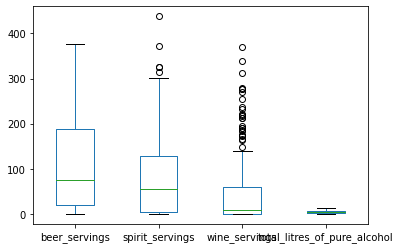

In [20]:
%matplotlib inline
drinks.plot(kind='box')

### Use a rule for example IQR range rule 

- IQR  =  Q3 - Q1
- LB  >=  Q1 - ( IQR * 1.5 ) 
- UB  <=  Q3 + ( IQR * 1.5 )

{'whiskers': [<matplotlib.lines.Line2D at 0x7fee6149b290>,
 'caps': [<matplotlib.lines.Line2D at 0x7fee6149bb10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fee614a2e90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fee614d4410>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fee614d4850>],
 'means': []}

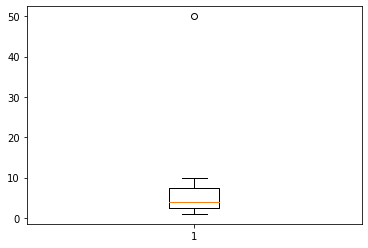

In [38]:
import numpy as np
import matplotlib.pyplot as plt
r = np.array([1, 2, 3, 4, 5, 10, 50])
plt.boxplot(r)

In [39]:
r.mean()

10.714285714285714

In [40]:
Q3 = np.percentile(r, 75)
Q1 = np.percentile(r, 25)
IQR = Q3 - Q1
IQR

5.0

In [41]:
for i in r:
    if i > (Q3 + (IQR*1.5)):
        print(i)
    

50


In [42]:
for i in r:
    if i < (Q1 - (IQR*1.5)):
        print(i)

### Using the loc index in Pandas

In [46]:
movies[movies.duration > 200]

,star_rating,title,content_rating,genre,duration,actors_list
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
630,7.7,Malcolm X,PG-13,Biography,202,"[u'Denzel Washington', u'Angela Bassett', u'De..."


In [47]:
movies.loc[movies.duration >200, :]

,star_rating,title,content_rating,genre,duration,actors_list
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
630,7.7,Malcolm X,PG-13,Biography,202,"[u'Denzel Washington', u'Angela Bassett', u'De..."


In [50]:
movies.loc[movies.duration >= 200, 'genre']

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

### Value counts and normalized 

In [59]:
a = drinks.continent.value_counts()
drinks.continent.value_counts()

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [60]:
b = drinks.continent.value_counts(normalize = True)
drinks.continent.value_counts(normalize = True)

Africa           0.274611
Europe           0.233161
Asia             0.227979
North America    0.119171
Oceania          0.082902
South America    0.062176
Name: continent, dtype: float64

### Concatenate two columns

In [105]:
pd.concat([a, b], axis = 1)

,continent,continent
Africa,53,0.274611
Europe,45,0.233161
Asia,44,0.227979
North America,23,0.119171
Oceania,16,0.082902
South America,12,0.062176


### Change data types in a dataframe

In [106]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
beer                              int64
dtype: object

In [107]:
# create a new column of type string
drinks['beer']= drinks.beer_servings.astype(str)

In [108]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
beer                             object
dtype: object

In [109]:
# change type into integer
drinks['beer'] = drinks.beer.astype(int)
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
beer                              int64
dtype: object

### Compute the sum of rows vs columns

In [110]:
data = pd.DataFrame({'A': [1,     2,   3,   4,   5], 
              'B': [10,   20,  30,  40,  50],
              'C': [100, 200, 501, 201, 409]})
data

,A,B,C
0,1,10,100
1,2,20,200
2,3,30,501
3,4,40,201
4,5,50,409


In [111]:
data['sum'] = data.sum(axis = 1)

In [112]:
data

,A,B,C,sum
0,1,10,100,111
1,2,20,200,222
2,3,30,501,534
3,4,40,201,245
4,5,50,409,464


In [113]:
data.sum(axis = 0)

A        15
B       150
C      1411
sum    1576
dtype: int64

In [ ]:
drinks.sum()

# Reshape pandas dataframe

In [114]:
ufo.shape

(18241, 5)

In [115]:
# all the dataframe except the last 30 rows
ufo.iloc[:-30, :].shape

(18211, 5)

In [117]:
# all the dataframe except the last two columns
ufo.iloc[: , :3 ].shape

(18241, 3)

In [119]:
# all the dataframe but only the first two rows
ufo.iloc[:, :-3].shape

(18241, 2)

### How to format time data
##### How to go from this 6/1/1930 to this 1930-01


In [131]:
ufo

,City,Colors Reported,Shape Reported,State,Time,year,month
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930,06
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930,06
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931,02
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931,06
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933,04
...,...,...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00,2000,12
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00,2000,12
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00,2000,12
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00,2000,12


In [132]:
ufo['Time'] = pd.to_datetime(ufo['Time'])

In [133]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
year                       object
month                      object
dtype: object

In [134]:
ufo['year'] = ufo.Time.dt.year.astype(str)

In [135]:
ufo

,City,Colors Reported,Shape Reported,State,Time,year,month
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930,06
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930,06
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931,02
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931,06
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933,04
...,...,...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00,2000,12
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00,2000,12
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00,2000,12
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00,2000,12


In [136]:
ufo['month'] = ufo.Time.dt.month.astype(str).str.pad(width=2, fillchar='0')

In [137]:
ufo

,City,Colors Reported,Shape Reported,State,Time,year,month
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930,06
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930,06
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931,02
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931,06
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933,04
...,...,...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00,2000,12
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00,2000,12
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00,2000,12
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00,2000,12


In [138]:
ufo.year.str.cat(ufo.month, sep = '-')

0        1930-06
1        1930-06
2        1931-02
3        1931-06
4        1933-04
          ...   
18236    2000-12
18237    2000-12
18238    2000-12
18239    2000-12
18240    2000-12
Name: year, Length: 18241, dtype: object

In [139]:
ufo['new_format'] = ufo.year.str.cat(ufo.month, sep = '-')

In [140]:
ufo

,City,Colors Reported,Shape Reported,State,Time,year,month,new_format
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930,06,1930-06
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930,06,1930-06
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931,02,1931-02
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931,06,1931-06
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933,04,1933-04
...,...,...,...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00,2000,12,2000-12
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00,2000,12,2000-12
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00,2000,12,2000-12
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00,2000,12,2000-12


### How to create a Pandas column starting from other columns.

In [143]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [149]:
# if sex is male and age is less than 30 create a column
# that will contain "yes" if the condition is satisfied otherwise it will
# contain "no"
titanic['young_male'] = ((titanic.Sex == 'male') & (titanic.Age < 30)).map({True:'yes', False:'no'})

In [150]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,young_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,yes
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,no
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,no
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,no
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,yes
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,no
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,no
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,yes


In [152]:
# if sex is female and age is above 30 create a column that will
# contain "1" if the condition is satisfied otherwise it will contain 0
titanic['mature_female'] = ((titanic.Sex == 'female') & (titanic.Age >= 30)).map({True: 1, False:0})

In [153]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,young_male,mature_female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,yes,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,no,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,no,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,no,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,yes,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,no,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,no,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,yes,0


### Get some rows with certain attributes in dataframe but not others

In [164]:
drinks[drinks.continent.isin(['Asia', 'Africa'])]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer
0,Afghanistan,0,0,0,0.0,Asia,0
2,Algeria,25,0,14,0.7,Africa,25
4,Angola,217,57,45,5.9,Africa,217
12,Bahrain,42,63,7,2.0,Asia,42
13,Bangladesh,0,0,0,0.0,Asia,0
...,...,...,...,...,...,...,...
186,Uzbekistan,25,101,8,2.4,Asia,25
189,Vietnam,111,2,1,2.0,Asia,111
190,Yemen,6,0,0,0.1,Asia,6
191,Zambia,32,19,4,2.5,Africa,32


In [166]:
### Get all the rows in a dataframe except for some which have a certain attribute
drinks[~drinks.continent.isin(['Asia', 'Africa'])]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer
1,Albania,89,132,54,4.9,Europe,89
3,Andorra,245,138,312,12.4,Europe,245
5,Antigua & Barbuda,102,128,45,4.9,North America,102
6,Argentina,193,25,221,8.3,South America,193
7,Armenia,21,179,11,3.8,Europe,21
...,...,...,...,...,...,...,...
182,United Kingdom,219,126,195,10.4,Europe,219
184,USA,249,158,84,8.7,North America,249
185,Uruguay,115,35,220,6.6,South America,115
187,Vanuatu,21,18,11,0.9,Oceania,21


### Check if two dataset are equal 

In [167]:
drinks1 = pd.read_csv('http://bit.ly/drinksbycountry')
drinks2 = pd.read_csv('http://bit.ly/drinksbycountry')

In [169]:
(drinks1 != drinks2).sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [171]:
# if you change something in the first dataset 
# it will reflect this change

drinks1.iloc[0, 0] = 'something else'
(drinks1 != drinks2).sum()

country                         1
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64